# Summary
* Baseline LinearSVC results
* C=1.0 (default)
* Accuracy = 58 %
* With classification report and confusion matrices


## Load Data

In [1]:
import re
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.utils.fixes import loguniform
from sklearn.utils import shuffle

dataframe = pd.read_csv('../URL_Classification.csv', header=None)
dataframe.columns = ["index", "url", "label"]

## Preprocessing

In [2]:
dataframe['url'] = dataframe['url'].apply(lambda x: np.str_(x))

## Prepare labels

In [3]:
labels = set(dataframe['label'])
label2id = {l: n for n, l in enumerate(labels)}
dataframe['label'] = dataframe['label'].map(label2id)

## Transform with count vectorizer

In [4]:
count_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(5, 5))
X = count_vectorizer.fit_transform(dataframe['url'])
y = dataframe['label'].values

X, y = shuffle(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

## Fit SVM

In [5]:
# clf = sklearn.linear_model.SGDClassifier(class_weight='balanced', loss='hinge', n_jobs=-1, alpha=1.8505070644749287e-05)
clf = sklearn.svm.LinearSVC(class_weight='balanced', verbose=1)
start = time.time()
clf.fit(X_train, y_train)
print(f'\nTraining Time: {time.time()-start}')

[LibLinear]....................................................................................................
optimization finished, #iter = 1000

Using -s 2 may be faster (also see FAQ)

Objective value = -6351.408162
nSV = 52320
....................................................................................................
optimization finished, #iter = 1000

Using -s 2 may be faster (also see FAQ)

Objective value = -25770.141938
nSV = 164256
....................................................................................................
optimization finished, #iter = 1000

Using -s 2 may be faster (also see FAQ)

Objective value = -19836.663946
nSV = 152365
....................................................................................................
optimization finished, #iter = 1000

Using -s 2 may be faster (also see FAQ)

Objective value = -49987.121019
nSV = 433422
...............................................................................................

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Classification report

In [6]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.34      0.38      0.36      1820
           1       0.53      0.58      0.55     11573
           2       0.60      0.56      0.58     11219
           3       0.65      0.63      0.64     48805
           4       0.38      0.40      0.39     19175
           5       0.53      0.56      0.54     23752
           6       0.72      0.68      0.70      6950
           7       0.60      0.57      0.58      5724
           8       0.38      0.36      0.37      9238
           9       0.50      0.49      0.49     21442
          10       0.58      0.57      0.57     21933
          11       0.70      0.68      0.69     20309
          12       0.56      0.58      0.57     48147
          13       0.56      0.56      0.56     11888
          14       0.65      0.63      0.64     50621

    accuracy                           0.58    312596
   macro avg       0.55      0.55      0.55    312596
weighted avg       0.58   

## Confusion matrices

Normalize: true:


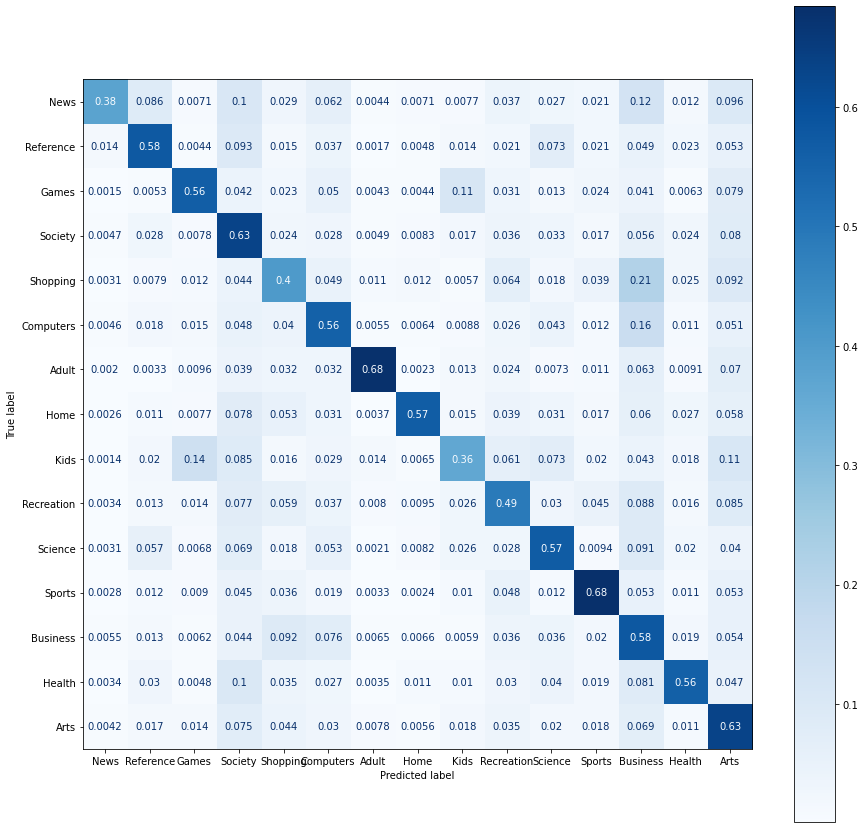

Normalize: pred:


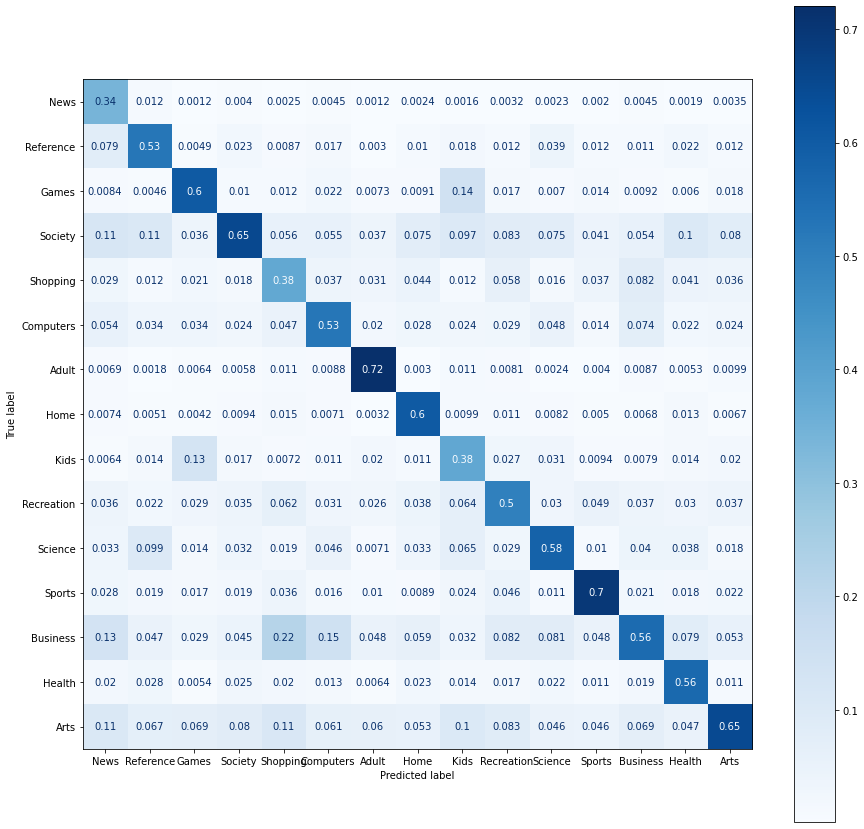

Normalize: None:


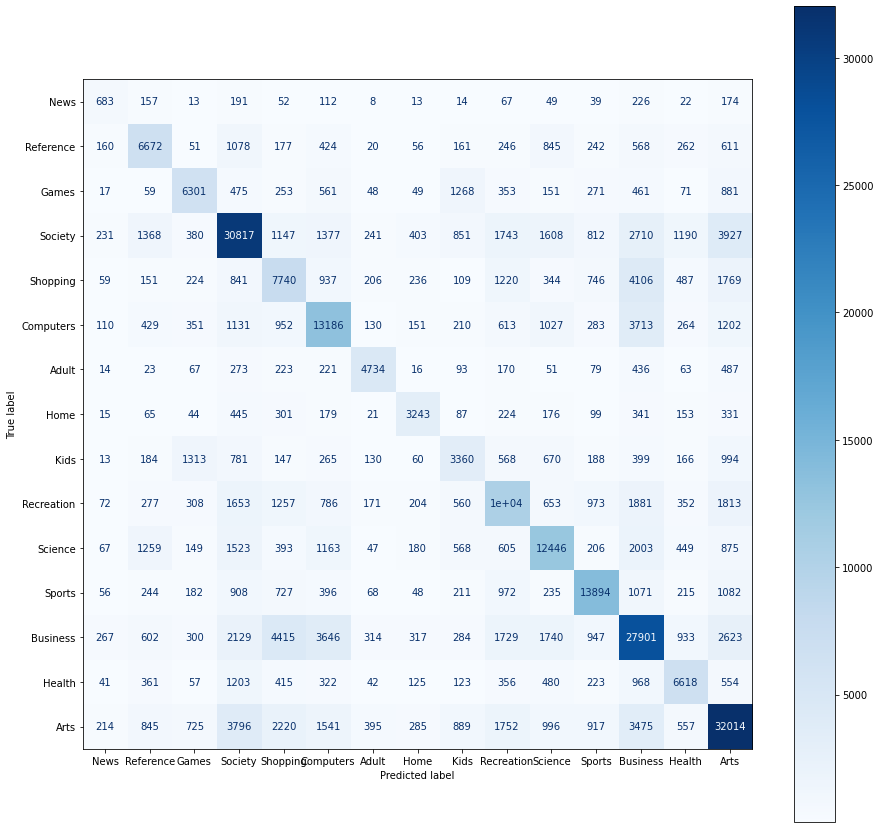

In [7]:
for norm in ['true', 'pred', None]:
    print(f'Normalize: {norm}:')
    _, ax = plt.subplots(figsize=(15,15))
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        display_labels=labels,
        cmap=plt.cm.Blues,
        normalize=norm,
        ax=ax
    )
    plt.show()